<a href="https://colab.research.google.com/github/pbrugierewebsite/QPM_Templates/blob/main/BookListing5_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  


annualised standard deviations of the returns:
DPW.DE    0.156128
ALV.DE    0.128447
BMW.DE    0.153356
BAS.DE    0.149975
FME.DE    0.169853
Name: 0, dtype: float64
annualised means of the returns:
DPW.DE    0.247998
ALV.DE    0.204991
BMW.DE   -0.023919
BAS.DE    0.044864
FME.DE    0.080143
Name: 0, dtype: float64
min variance portfolio:
sd_a 0.1112726048763086 ,m_a 0.12587219585783943
matrix of variance-covariance:
          DPW.DE    ALV.DE    BMW.DE    BAS.DE    FME.DE
DPW.DE  0.024376  0.011194  0.009907  0.012387  0.009991
ALV.DE  0.011194  0.016499  0.009791  0.011556  0.007837
BMW.DE  0.009907  0.009791  0.023518  0.011885  0.007562
BAS.DE  0.012387  0.011556  0.011885  0.022493  0.010644
FME.DE  0.009991  0.007837  0.007562  0.010644  0.028850
Correl Matrix
          DPW.DE    ALV.DE    BMW.DE    BAS.DE    FME.DE
DPW.DE  1.000000  0.558167  0.413777  0.529003  0.376738
ALV.DE  0.558167  1.000000  0.497051  0.599888  0.359196
BMW.DE  0.413777  0.497051  1.000000  0.516735  0.2

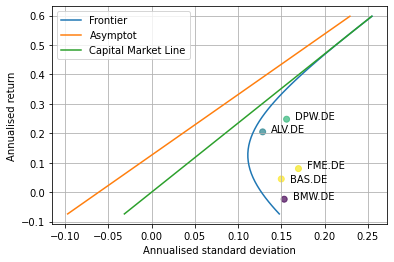

In [1]:
# Library importations
import pandas as pd
import pandas_datareader.data as web
import numpy as np
import math
from numpy import linalg as LA
from numpy.linalg import inv
from scipy import stats
#from matplotlib import pyplot as plt # delete for Python 3
import matplotlib.pyplot as plt # add for Python 3
fig, ax = plt.subplots()

# Data extraction
data = pd.Series()
TickerDax = ['DPW.DE','ALV.DE','BMW.DE','BAS.DE','FME.DE']
for x in TickerDax :
    data[x] = web.DataReader(name = x, data_source='yahoo',start='2017-01-1',end='2017-12-31')

# Variable creations
r=0 # risk-free rate
AFactor = len(data['DPW.DE'])-1 # annualisation factor, based on number of observations in a year
n_TickerDax = len(TickerDax) # nb of stocks considered
Vec1 = np.linspace(1, 1, n_TickerDax) # create a vector, with all components equal to 1
data_R = pd.DataFrame() # daily returns
Mdata_R = pd.DataFrame() # means of the daily returns
Sigma = pd.DataFrame() # variance-covariance matrix of the returns annualised
Sigma_diag = pd.DataFrame() # individual variances (derived from the variance-covariance matrix)

for x in TickerDax:  
    data_R[x] = (data[x]['Close']/data[x]['Close'].shift(1)-1)
Sigma = AFactor*data_R.cov() # annualisation, the missing values are not taken into account with .Cov()
InvSigma = inv(Sigma)  
for x in TickerDax:  
    Sigma_diag[x] = [Sigma[x][x]] 
    Mdata_R[x]= [float(np.mean(data_R[x])) ] 

# Model parameters, derived from the observations
Mean =  AFactor* Mdata_R.iloc[0] # average returns on an annualised basis 
STD = Sigma_diag.iloc[0]**.5 # standard deviations on an annualised basis

# Important variables calculation
a = Vec1.T.dot(InvSigma).dot(Vec1) 
b = Mean.T.dot(InvSigma).dot(Vec1) 
sd_a = 1 / math.sqrt(a) # standard deviation, minimum variance portfolio
m_a = b / a # expected return, minimum variance portfolio
m_w = math.sqrt((Mean - b/a * Vec1).T.dot(InvSigma).dot(Mean - b/a * Vec1)) # expected return, portfolio w
m_r = math.sqrt((Mean - r * Vec1).T.dot(InvSigma).dot(Mean - r * Vec1)) # expected return, Tangent Portfolio 

# Graph plotting
np.random.seed(7777) # Fixing random state for reproducibility
colors = np.random.rand(len(STD)) # each point will have its own (random) color
plt.scatter(STD, Mean, c=colors, alpha=0.7) # plot the assets, alpha transparency parameter
ax.annotate(TickerDax[0], (STD[0]+.01,Mean[0] ))
ax.annotate(TickerDax[1], (STD[1]+.01,Mean[1] ))
ax.annotate(TickerDax[2], (STD[2]+.01,Mean[2] ))
ax.annotate(TickerDax[3], (STD[3]+.01,Mean[3]-.01 ))
ax.annotate(TickerDax[4], (STD[4]+.01,Mean[4] ))
range_inf = np.min(Mean) - 0.05
range_sup = np.max(Mean) + 0.35
z2 = np.linspace(range_inf , range_sup, 50) # range of expected returns considered
z1 = pd.DataFrame() 
z= pd.DataFrame() 
zr= pd.DataFrame()
i=0
for i in range(len(z2)):
    z1[i]= [math.sqrt( ((z2[i]- m_a)/m_w)**2 + sd_a**2 )] # Frontier
    z[i]= [(z2[i] - b/a)/m_w] # Asymptot to the Frontier
    zr[i]= [(z2[i] - r)/m_r] # Capital Marlet Line
z1 = z1.iloc[0]
z=z.iloc[0]
zr=zr.iloc[0]
plt.plot(z1, z2, alpha=1) # plot the Frontier 
plt.plot(z, z2, alpha=1) # plot the asymptot to the Frontier 
plt.plot(zr, z2, alpha=1) # plot the Capital Market Line 
plt.legend(['Frontier','Asymptot','Capital Market Line' ], loc=2)
plt.grid(True)
plt.xlabel('Annualised standard deviation')
plt.ylabel('Annualised return')

# Useful Ouputs. 
print ("annualised standard deviations of the returns:") 
print (STD) 
print ("annualised means of the returns:")
print (Mean) 
print ("min variance portfolio:")
print ("sd_a", sd_a, ",m_a", b/a) 
print ("matrix of variance-covariance:")
print (Sigma)
print ("Correl Matrix")
print (data_R . corr ())